In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data=pd.read_csv('user_behavior_dataset.csv')
df=data.copy()

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [69]:
data.drop(["User ID","User Behavior Class"],axis=1,inplace=True)

In [70]:
data.describe()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857
std,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916
min,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000
25%,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000
50%,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000
75%,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000
max,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000


In [71]:
df['App Usage Time (hours/day)'] = df['App Usage Time (min/day)'] / 60
df['Data Usage (GB/day)'] = df['Data Usage (MB/day)'] / 1024
df.drop(['App Usage Time (min/day)', 'Data Usage (MB/day)'], axis=1, inplace=True)

In [72]:
df = df.loc[:, ["App Usage Time (hours/day)", "Screen On Time (hours/day)",
                "Battery Drain (mAh/day)", "Number of Apps Installed",
                "Data Usage (GB/day)", "Age"]]


In [73]:
df.head()

,App Usage Time (hours/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (GB/day),Age
0,6.550000,6.4,1872,67,1.095703,40
1,4.466667,4.7,1331,42,0.921875,47
2,2.566667,4.0,761,32,0.314453,42
3,3.983333,4.8,1676,56,0.850586,20
4,3.116667,4.3,1367,58,0.964844,31


In [74]:
df.isnull().sum()

App Usage Time (hours/day)    0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (GB/day)           0
Age                           0
dtype: int64

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_scaled = scaler.fit_transform(df)

### Model Building

In [76]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
wcss= []

for i in range(3,10):
    model= KMeans(n_clusters=i, random_state=42, n_init=20)
    model.fit(df_scaled)
    wcss.append(model.inertia_)


In [77]:
wcss1=pd.Series(wcss)
wcss1.index=range(3,10)
wcss1

3    1133.176273
4     888.291611
5     697.451754
6     592.017597
7     490.869819
8     406.518498
9     361.307998
dtype: float64

Text(0.5, 1.0, 'Elbow Method')

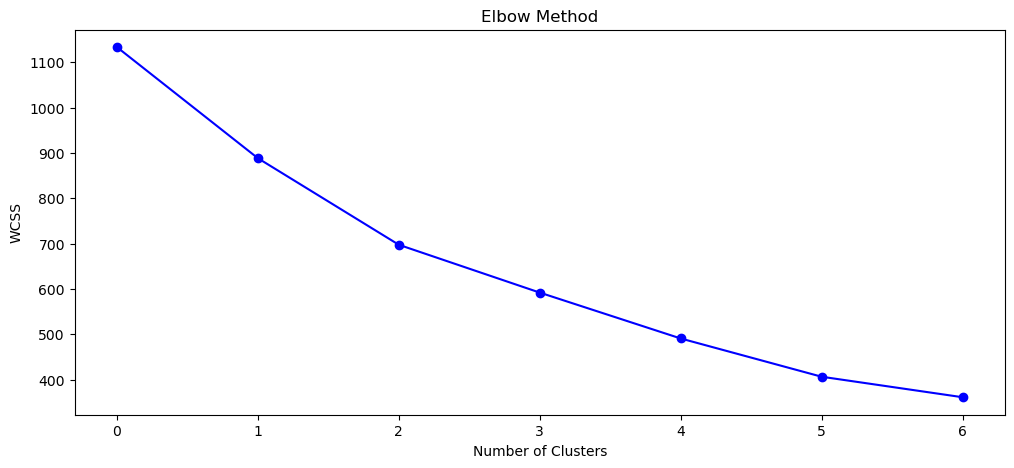

In [78]:
plt.figure(figsize=(12, 5))
plt.plot(wcss, marker='o', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")

In [79]:
import warnings
warnings.filterwarnings('ignore')
model=KMeans(n_clusters=4,random_state=42)
model.fit(df_scaled)
model.inertia_

888.29161075013

In [80]:
from sklearn.metrics import silhouette_score

In [81]:
model.inertia_

888.29161075013

In [82]:
silhouette_score(df_scaled,model.labels_)

0.43070497816721887

In [83]:
import warnings
warnings.filterwarnings('ignore')
final_model=KMeans(n_clusters=3,random_state=42)
final_model.fit(df_scaled)
final_model.inertia_

1133.1762728918739

In [84]:
final_model.inertia_

1133.1762728918739

In [85]:
silhouette_score(df_scaled,final_model.labels_)

0.42000568605899813

In [86]:
data['Cluster']=final_model.labels_
data.shape

(700, 10)

In [87]:
data['Remarks']=np.nan

In [88]:
data.loc[data.Cluster == 0, 'Remarks'] = 'Light User'

In [89]:
data.loc[data.Cluster == 1, 'Remarks'] = 'Moderate User'

In [90]:
data.loc[data.Cluster == 2, 'Remarks'] = 'Heavy User'

In [91]:
data

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,Cluster,Remarks
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,2,Heavy User
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,2,Heavy User
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,0,Light User
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,2,Heavy User
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,2,Heavy User
...,...,...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,0,Light User
696,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,2,Heavy User
697,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,0,Light User
698,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,0,Light User


In [92]:
data.Cluster.value_counts()

Cluster
0    282
2    281
1    137
Name: count, dtype: int64